# Project 1, Econ 426

### Question 1
- Go to Fred database and download the following series for the past 10 years:\
  Real Personal Consumption Expenditures(Q, SA) , Real Gross Private Domestic Investment (Q, SA). Calculate the growth rates for the both series. compare the calculated growth rates to the logarithm of ratio. What are the time points where the difference is high? Explain why.

#### a). Real Personal Consumption Expenditures. (data1)

In [5]:
import pandas as pd
data1=pd.read_csv('PCEC.csv')


In [6]:
data1['DATE'] = pd.to_datetime(data1['DATE'])
data1 = data1.set_index('DATE')


In [7]:
import numpy as np
data1['PCEC96'] = pd.to_numeric(data1['PCEC96'],errors = 'coerce') #converts strings to numbers
data1['logPCEC96'] = np.log(data1['PCEC96'])

data1.head()


,PCEC96,logPCEC96
DATE,,
2010-01-01,10488.1,9.257997
2010-02-01,10519.9,9.261024
2010-03-01,10568.3,9.265614
2010-04-01,10588.9,9.267562
2010-05-01,10605.6,9.269137


In [8]:
data1['lPCEC96']=data1['PCEC96'].shift(1)


In [9]:
data1['gPCEC96']=data1['PCEC96']/data1['lPCEC96'] - 1


In [10]:
data1['logratio']=np.log(data1['PCEC96']/data1['lPCEC96'])


In [31]:
data1.fillna(0).head()

,PCEC96,logPCEC96,lPCEC96,gPCEC96,logratio,Compare
DATE,,,,,,
2010-01-01,10488.1,9.257997,0.0,0.000000,0.000000,0.000000
2010-02-01,10519.9,9.261024,10488.1,0.003032,0.003027,0.000005
2010-03-01,10568.3,9.265614,10519.9,0.004601,0.004590,0.000011
2010-04-01,10588.9,9.267562,10568.3,0.001949,0.001947,0.000002
2010-05-01,10605.6,9.269137,10588.9,0.001577,0.001576,0.000001


In [12]:
data1['Compare']= abs(data1['gPCEC96']-data1['logratio'])


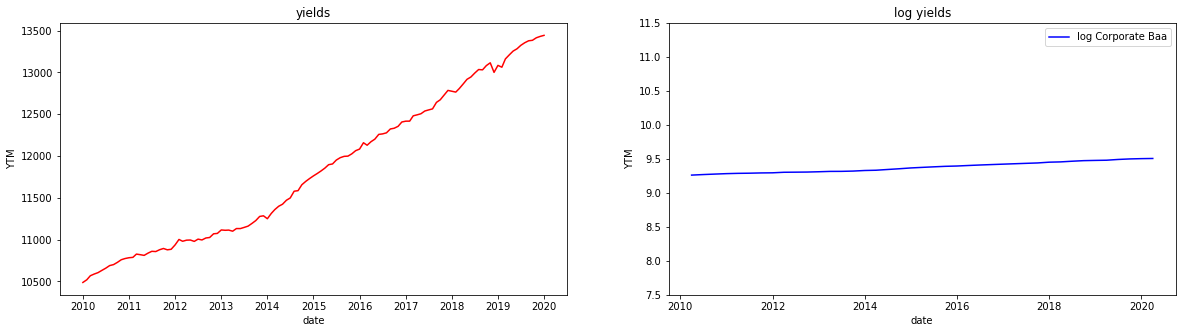

In [42]:
import matplotlib.pyplot as plt
plt.figure(figsize = (20,5))
plt.subplot(121)
plt.plot(data1['PCEC96'],color='r',label='Corporate Baa')
plt.xlabel('date')
plt.title('yields')
plt.ylabel('YTM')
plt.subplot(122)
plt.plot(data1['logPCEC96'].resample('q').mean(),color='b',label='log Corporate Baa')
plt.ylim([7.5,11.5])
plt.xlabel('date')
plt.title('log yields')
plt.ylabel('YTM')
plt.legend(loc='best')
plt.show()

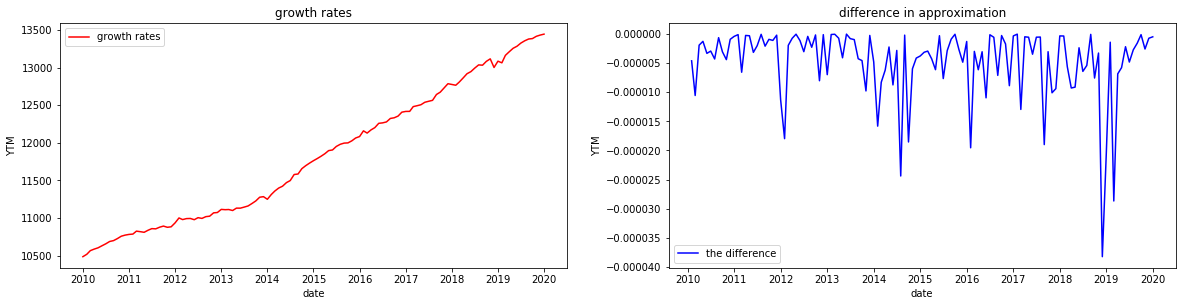

In [41]:
fig1 = plt.figure(figsize = (20,5))
fig1.autofmt_xdate()
plt.subplot(121)
plt.plot(data1['PCEC96'],color='r',label='growth rates')
plt.xlabel('date')
plt.title('growth rates')
plt.ylabel('YTM')
plt.legend(loc='best')
plt.subplot(122)
plt.plot(data1['logratio']-data1['gPCEC96'],color='b',label='the difference')
plt.xlabel('date')
plt.title('difference in approximation')
plt.ylabel('YTM')
plt.legend(loc='best')
plt.show()

#### b). Real Gross Private Domestic Investment(data2)

In [25]:
data2=pd.read_csv('GPDIC1.csv')
data2['DATE'] = pd.to_datetime(data2['DATE'])
data2 = data2.set_index('DATE')
data2['GPDIC1'] = pd.to_numeric(data2['GPDIC1'],errors = 'coerce') 
data2['logGPDIC1'] = np.log(data2['GPDIC1'])
data2['lGPDIC1']=data2['GPDIC1'].shift(1)
data2['gGPDIC1']=data2['GPDIC1']/data2['lGPDIC1'] - 1
data2['logratio']=np.log(data2['GPDIC1']/data2['lGPDIC1'])
data2['Compare']= abs(data2['gGPDIC1']-data2['logratio'])

In [30]:
data2.fillna(0).head()

,GPDIC1,logGPDIC1,lGPDIC1,gGPDIC1,logratio,Compare
DATE,,,,,,
2009-10-01,2040.736,7.621066,0.000,0.000000,0.000000,0.000000
2010-01-01,2087.171,7.643565,2040.736,0.022754,0.022499,0.000255
2010-04-01,2196.706,7.694714,2087.171,0.052480,0.051149,0.001331
2010-07-01,2294.672,7.738345,2196.706,0.044597,0.043631,0.000966
2010-10-01,2287.362,7.735154,2294.672,-0.003186,-0.003191,0.000005


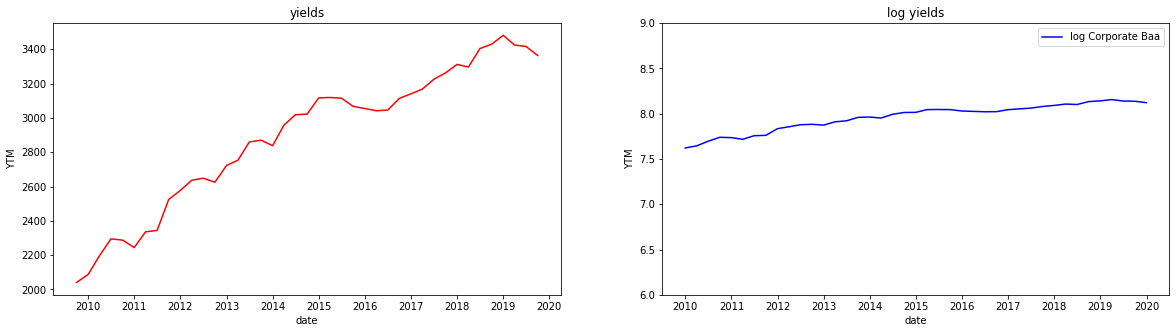

In [35]:
import matplotlib.pyplot as plt
plt.figure(figsize = (20,5))
plt.subplot(121)
plt.plot(data2['GPDIC1'],color='r',label='Corporate Baa')
plt.xlabel('date')
plt.title('yields')
plt.ylabel('YTM')
plt.subplot(122)
plt.plot(data2['logGPDIC1'].resample('q').mean(),color='b',label='log Corporate Baa')
plt.ylim([6.00,9.00])
plt.xlabel('date')
plt.title('log yields')
plt.ylabel('YTM')
plt.legend(loc='best')
plt.show()

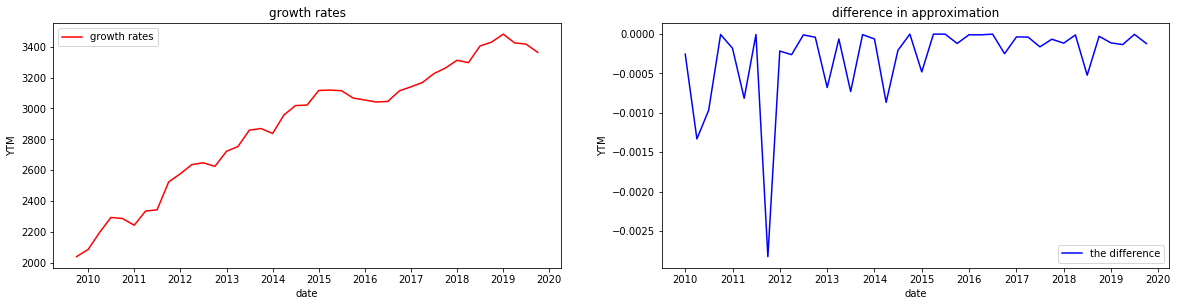

In [32]:
fig2 = plt.figure(figsize = (20,5))
fig2.autofmt_xdate()
plt.subplot(121)
plt.plot(data2['GPDIC1'],color='r',label='growth rates')
plt.xlabel('date')
plt.title('growth rates')
plt.ylabel('YTM')
plt.legend(loc='best')
plt.subplot(122)
plt.plot(data2['logratio']-data2['gGPDIC1'],color='b',label='the difference')
plt.xlabel('date')
plt.title('difference in approximation')
plt.ylabel('YTM')
plt.legend(loc='best')
plt.show()

In [22]:
data1.nlargest(1,'Compare')

,PCEC96,logPCEC96,lPCEC96,gPCEC96,logratio,Compare
DATE,,,,,,
2018-12-01,13001.2,9.472797,13115.6,-0.008722,-0.008761,0.000038


In [23]:
data2.nlargest(1,'Compare')

,GPDIC1,logGPDIC1,lGPDIC1,gGPDIC1,logratio,Compare
DATE,,,,,,
2011-10-01,2524.429,7.83377,2343.786,0.077073,0.074247,0.002826


#### c). Explaination 

According to my method, the diffrence in growth rate and logmatics were highest on 2018/12/01 for data1 and 2011/10/01 for data2 and the resault matched the diagrams above.

### Question2
- Download the weekly data on treasury bond yields (one option is treasury.gov) for 2020.
  plot the evolution of the yield for the 3 month and 30 year bonds over time using python. Plot the most recent yield curve.

In [37]:
import pandas as pd
datay=pd.read_csv('Yield.csv')

In [38]:
datay['DATE'] = pd.to_datetime(datay['DATE'])
datay = datay.set_index('DATE')

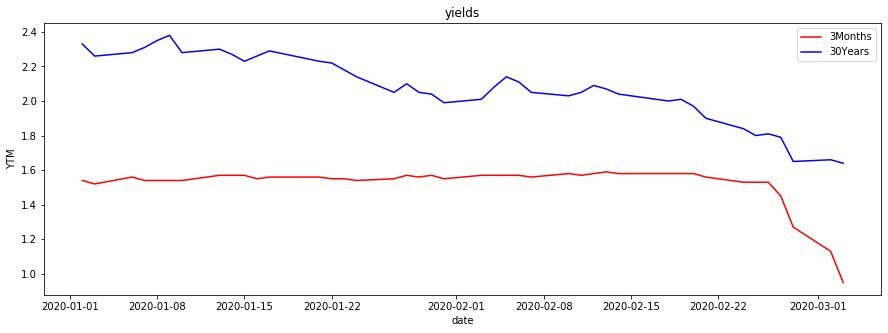

In [40]:
 import matplotlib.pyplot as plt
plt.figure(figsize = (15,5))
plt.plot(datay['3 Mo'],color='r',label='3Months')
plt.xlabel('date')
plt.title('yields')
plt.ylabel('YTM')
plt.legend(loc='best')
plt.plot(datay['30 Yr'],color='b',label='30Years')
plt.xlabel('date')
plt.title('yields')
plt.ylabel('YTM')
plt.legend(loc='best')
plt.show()

### Question 3
- Consider investing money with [yearly]interest rate of 10%. If you get interest payment only once in the end of the year, unit investment will yield you 1.1. If you had the option of splitting the interest rate to 10/2 % = 5% and receive interest payments twice a year, then you’ll get 1.05^2>1.1. Splitting that further to n times and receiving (10/n) % interest rate will make your unit investment pay back more and more through the year. Plot the interest payments as a function of n, that is, the sequence 1.1, then 1.05^2, etc till 24 times per period(that is, you get the interest payment twice a month). Compare that to the continuous compounding rate, e^i.